# Appendix

# Import Packages

I imported seaborn, matplotlib, numpy and pandas

In [1]:
#imported seaborn; matplotlib
import matplotlib
import numpy as np
import pandas as pd
import os
import itertools
from math import sqrt
from scipy import stats as st
#import cvxopt

import sklearn 
from sklearn.preprocessing import StandardScaler # used for variable scaling data
from sklearn.preprocessing import MinMaxScaler as Scaler # used for variable scaling data
from sklearn.model_selection import train_test_split

import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor # Random Forest package
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees package
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting package

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import make_scorer, accuracy_score 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import statsmodels.api as sm

import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sns
sns.set_style("whitegrid")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Read in data from CSV file

In [3]:
#import dataset
boston_df=pd.read_csv('https://raw.githubusercontent.com/djp840/MSDS_422_Public/master/MSDS422_Assignment_04/data/MSDS422_boston.csv')

Get shape of data

In [4]:
#calculate shape
boston_df.shape

(506, 14)

See the initial data

In [5]:
boston_df.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


See the data types of columns

In [6]:
boston_df.dtypes

neighborhood     object
crim            float64
zn              float64
indus           float64
chas              int64
nox             float64
rooms           float64
age             float64
dis             float64
rad               int64
tax               int64
ptratio         float64
lstat           float64
mv              float64
dtype: object

Drop the not quantitative data

In [7]:
#Drop non numeric columns
boston_df = boston_df.drop('neighborhood', 1)

See the data again with column dropped

In [8]:
#see if column has been dropped
boston_df.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Run the traditional statistics to summarize data

In [9]:
#check to see if there are typos and look at typical stats
boston_df.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


See if there is any missing data

In [10]:
#look at data and check if there is NA values
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
mv         0
dtype: int64

See if there is any outliers in the data

<AxesSubplot:>

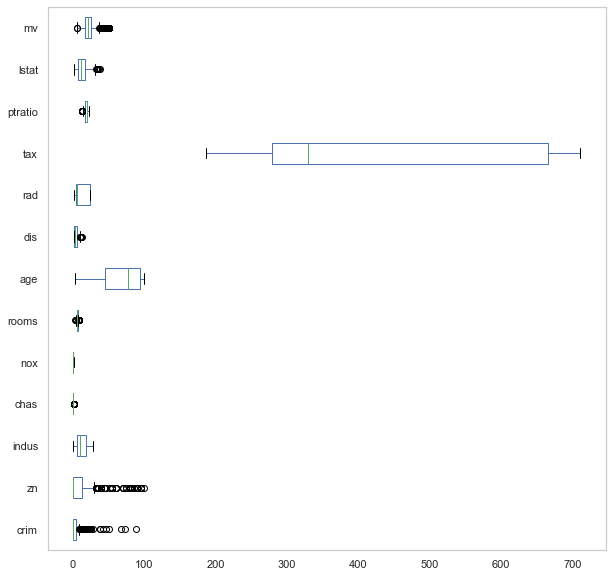

In [11]:
boston_df.boxplot(vert=False, figsize=(10,10), grid=False)

Make a histograms and see median values of house prices in each neigborhood

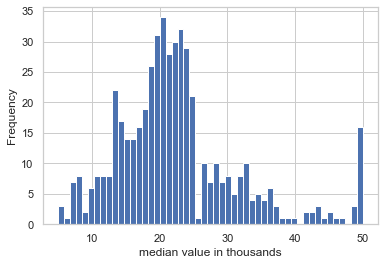

In [12]:
plt.hist(boston_df['mv'], bins = 51)
plt.xlabel('median value in thousands')
plt.ylabel('Frequency')
plt.show()

Wanted to see which data had linear shape

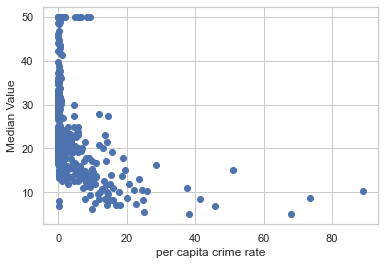

In [13]:
plt.plot(boston_df['crim'], boston_df['mv'], 'bo')
plt.xlabel('per capita crime rate')
plt.ylabel('Median Value')
plt.show()

Saw rooms column and saw a liner shape which means positive correlation

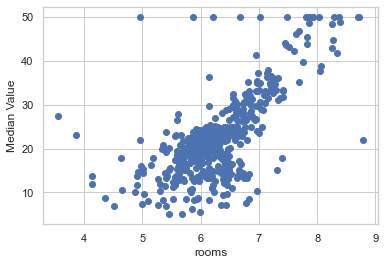

In [14]:
plt.plot(boston_df['rooms'], boston_df['mv'], 'bo')
plt.xlabel('rooms')
plt.ylabel('Median Value')
plt.show()

Do not see any strong correlation

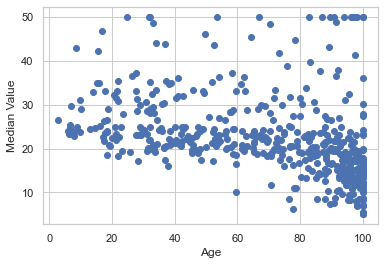

In [15]:
plt.plot(boston_df['age'], boston_df['mv'], 'bo')
plt.xlabel('Age')
plt.ylabel('Median Value')
plt.show()

I see initial data in graphs in this pairplot

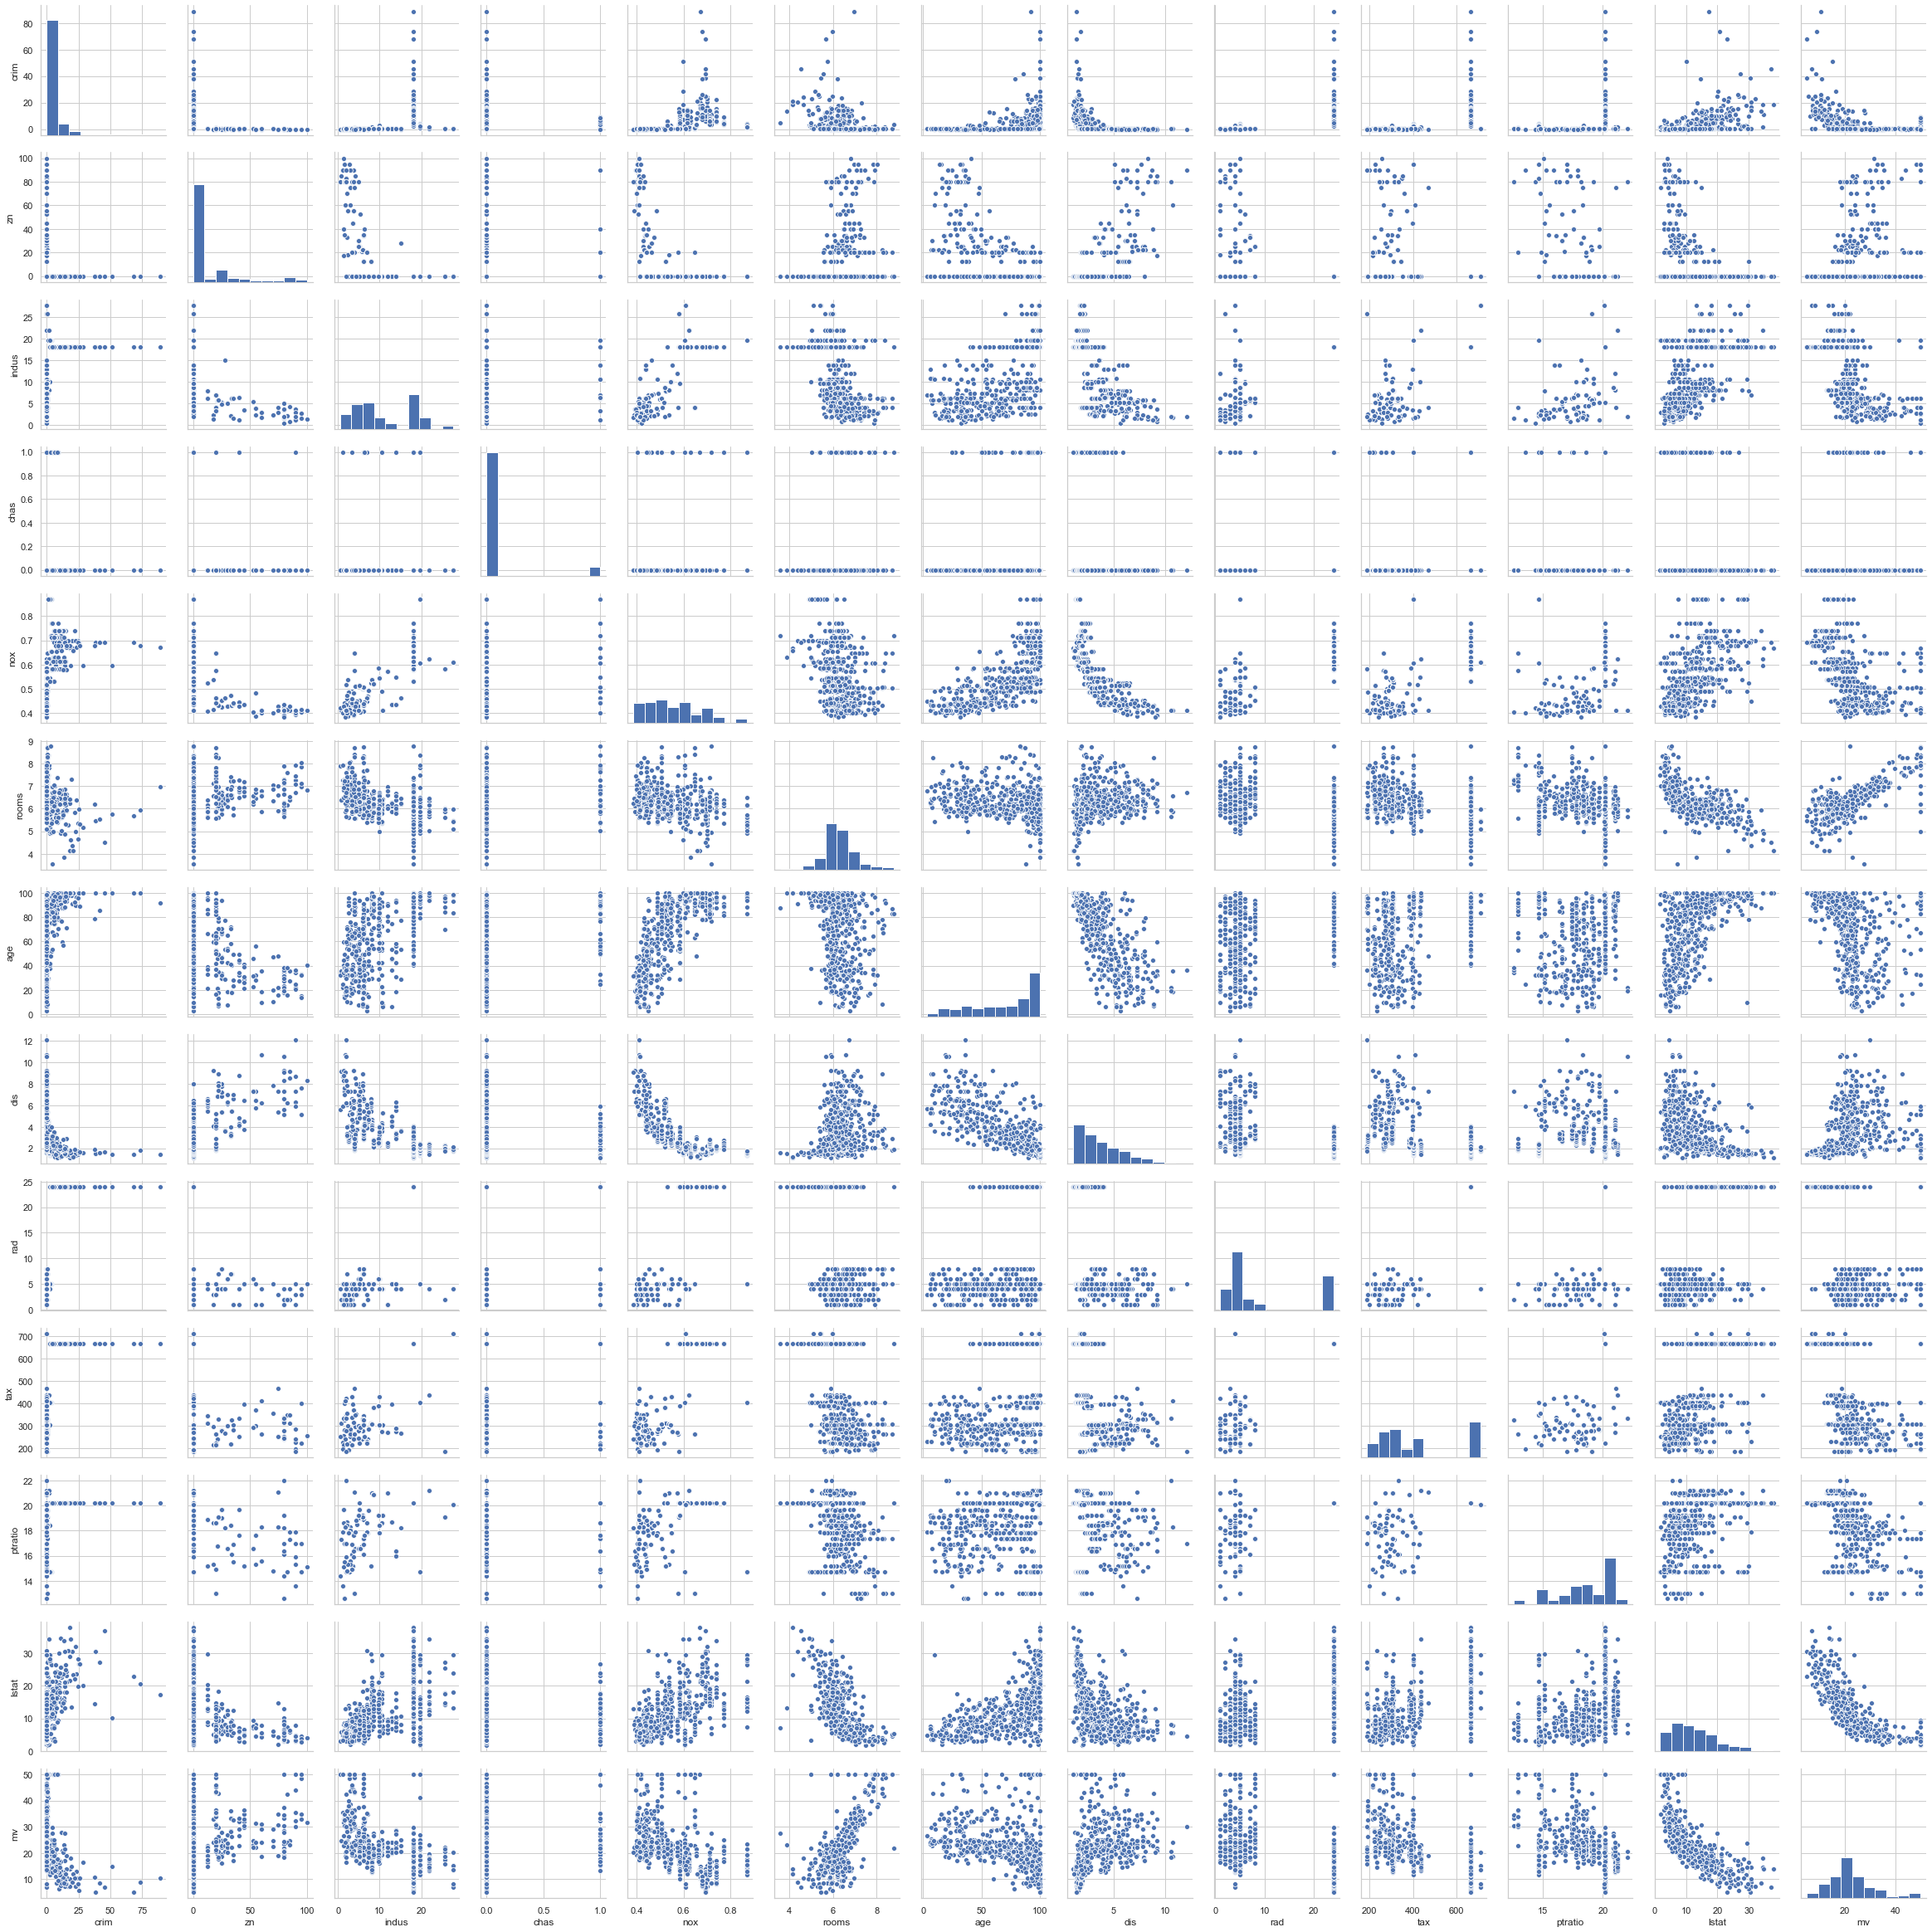

In [16]:
sns.pairplot(boston_df, diag_kind='hist')

Make copy of data

In [17]:
boston_df1=boston_df.copy()

Drop all columns except for target column

In [18]:
#saves the column we want to predict
columns = ['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']
boston_Target = boston_df1.drop(columns=columns)

In [19]:
boston_Target

,mv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


See shape again should only have 1 column, 506 rows

In [20]:
#makes sure shape is right
boston_Target.shape

(506, 1)

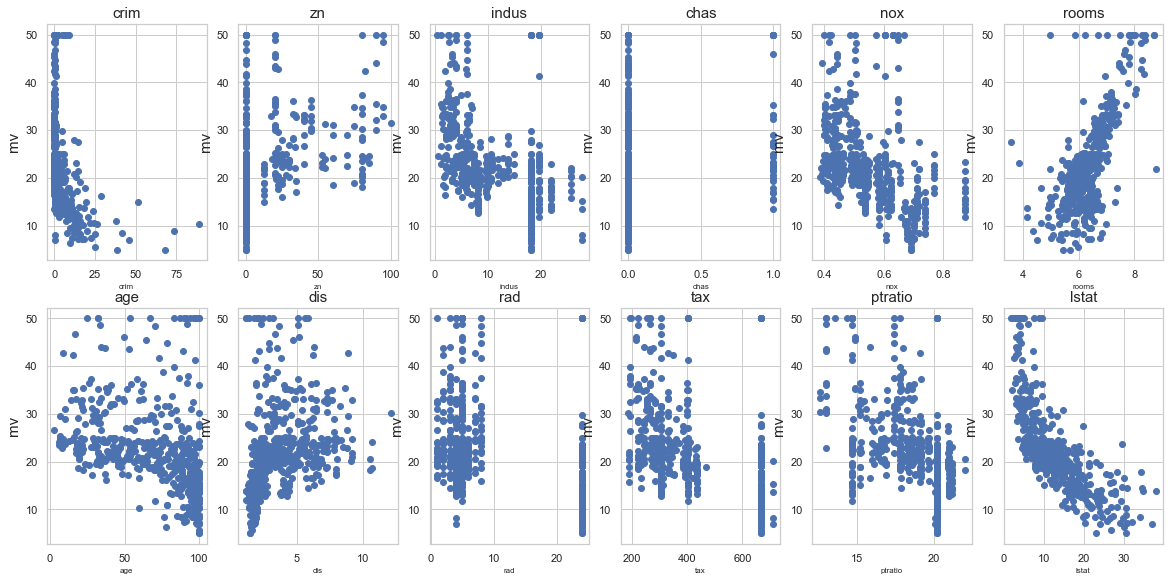

In [21]:
features = boston_df1.drop('mv', 1).columns
target = boston_Target
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(boston_df1[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8)
    plt.ylabel('mv', fontsize=15)

In [22]:
boston_df1

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


Make lambda function to add .01 to all columns with zeros; then use boxcox to make more normal distribution to columns which are non-linear and make more linear for linear regression

In [23]:
#need to transform data to find linear relationship
boston_df=boston_df.apply(lambda x: x+.01)
boston_df[['age', 'zn', 'crim', 'ptratio', 'chas', 'indus', 'nox', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]=boston_df[['age', 'zn', 'crim', 'ptratio', 'chas', 'indus', 'nox', 'dis', 'rad', 'tax', 'ptratio', 'lstat']].transform(lambda x: st.boxcox(x)[0])

See pairplot again

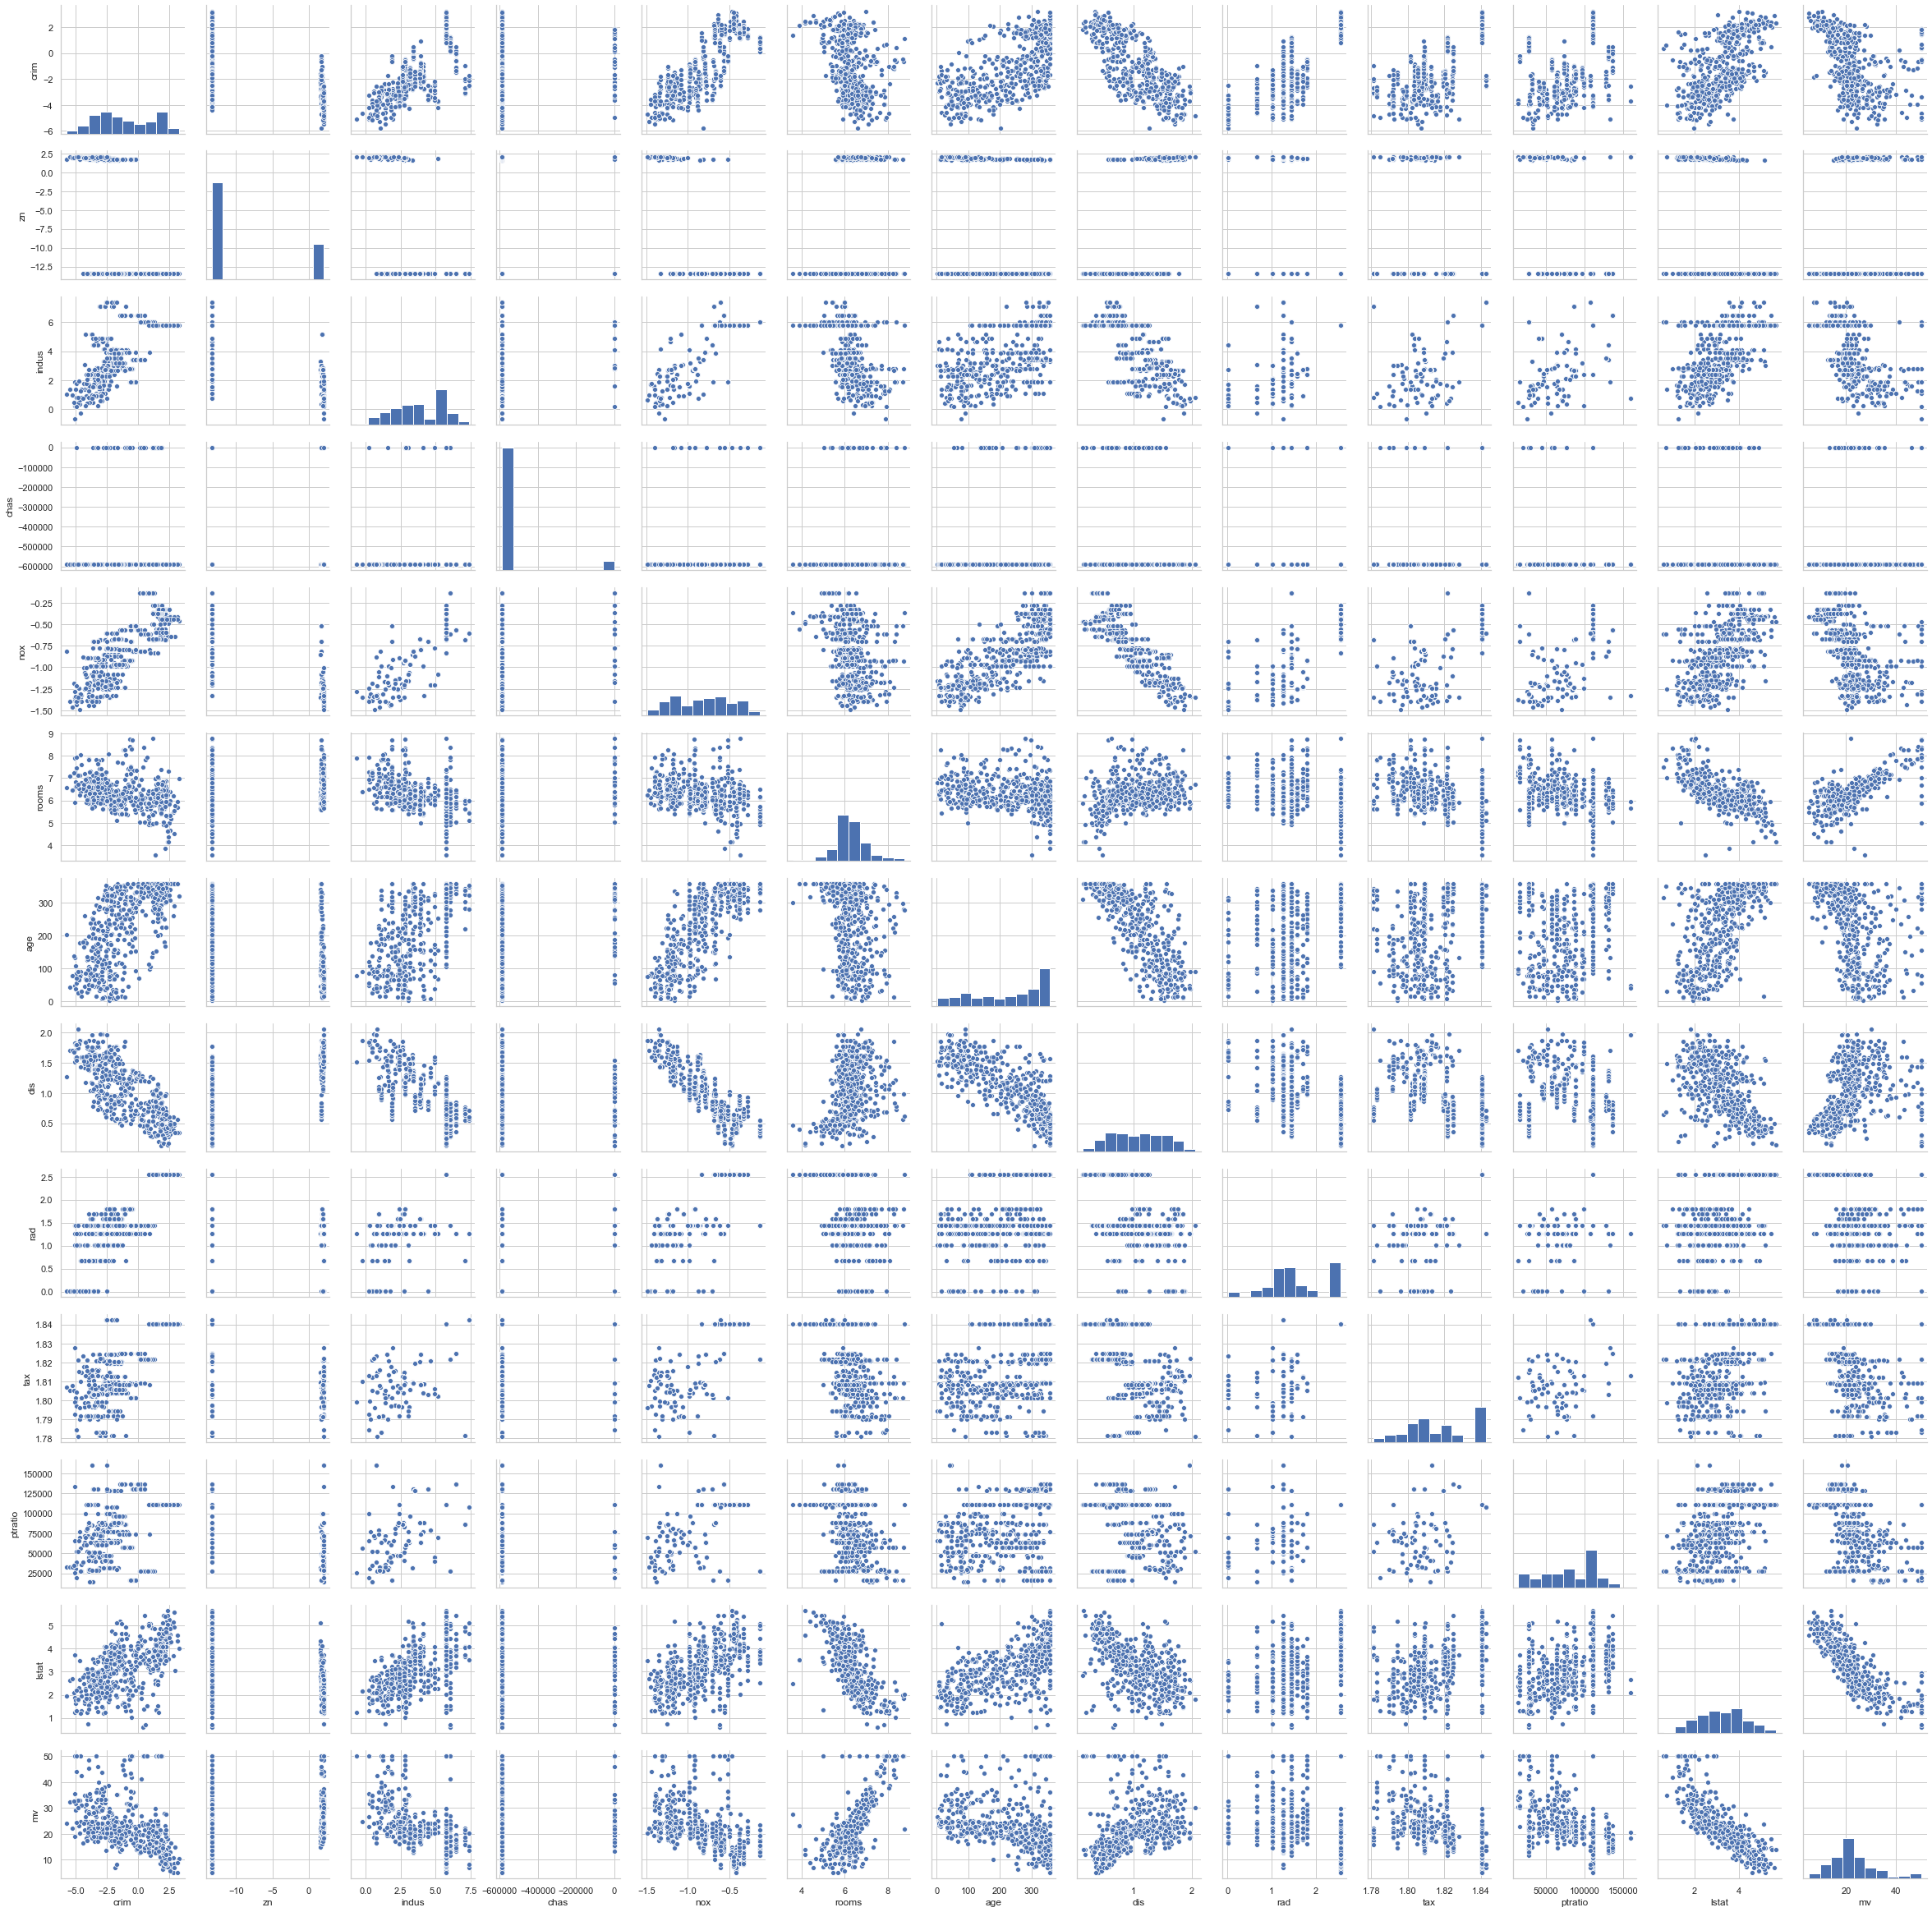

In [24]:
sns.pairplot(boston_df, diag_kind='hist')

Use scaler to make everythiing with 0 and 1 using min max scaler

In [25]:
#scale data by min max scaler
boston_df=boston_df.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

Make histogram matrix and as you can see everything is within 0 and 1.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'chas'}>,
        <AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'mv'}>,
        <AxesSubplot:title={'center':'nox'}>],
       [<AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'tax'}>],
       [<AxesSubplot:title={'center':'zn'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

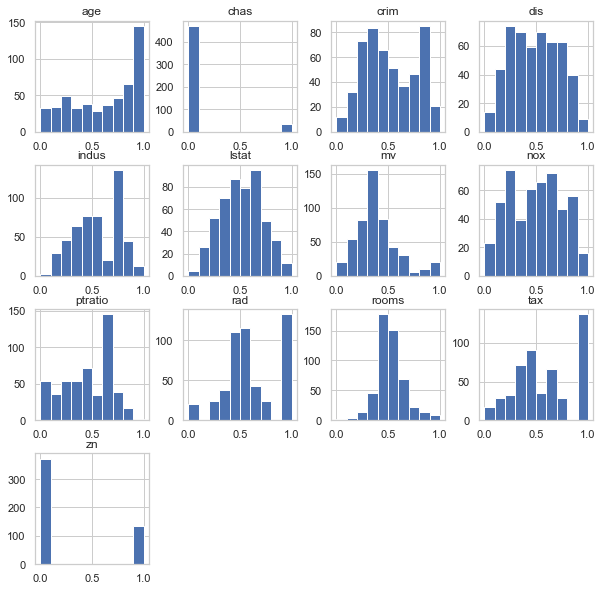

In [26]:
boston_df.hist(figsize=(10,10))

 Did not have to scale median value of house variable

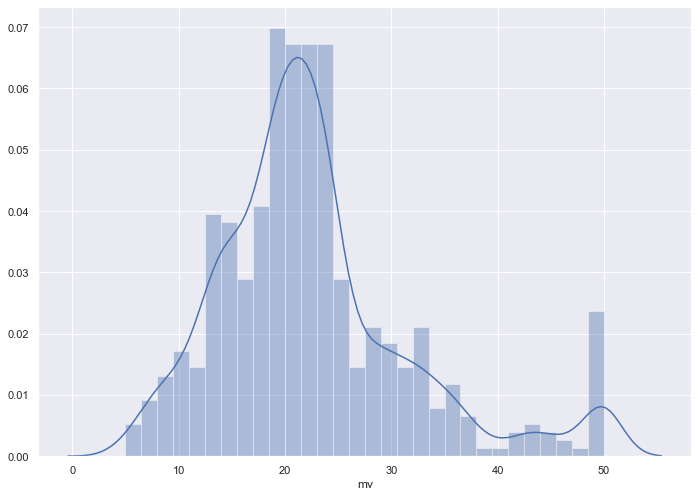

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_Target['mv'], bins=30)
plt.show()

See data scaled and transformed and perform tradition summary statistics; move target variable to front

In [28]:
cols = boston_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
boston_df4=boston_df[cols]
boston_df4.describe(include="all")

,mv,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.389530,0.518606,0.261061,0.562812,0.069170,0.490420,0.521869,0.625279,0.485270,0.625027,0.581265,0.461663,0.517794
std,0.204048,0.247164,0.435430,0.232825,0.253994,0.251621,0.134627,0.315506,0.229684,0.260145,0.280933,0.236275,0.200937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.267222,0.319026,0.000000,0.378568,0.000000,0.249073,0.445392,0.337094,0.297601,0.491579,0.375989,0.298320,0.364902
50%,0.360000,0.476717,0.000000,0.559586,0.000000,0.500909,0.507281,0.707846,0.485207,0.562195,0.511675,0.489371,0.524193
75%,0.444444,0.771394,0.967068,0.796857,0.000000,0.678615,0.586798,0.920638,0.683853,1.000000,0.965644,0.659680,0.667866
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Make correlation heat map

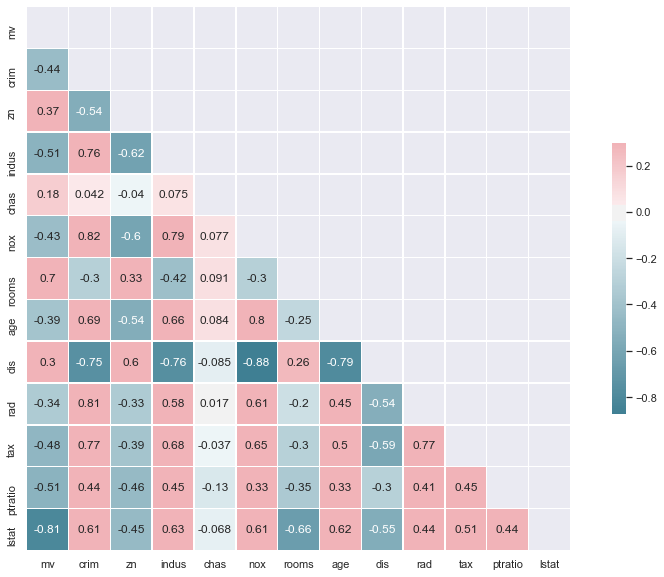

In [29]:
#check correlations
plt.figure(figsize=(15,10))
corr=boston_df4.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [30]:
boston_df6=boston_df4.copy()
boston_df5 = boston_df4

See features scaled and see their dot graph

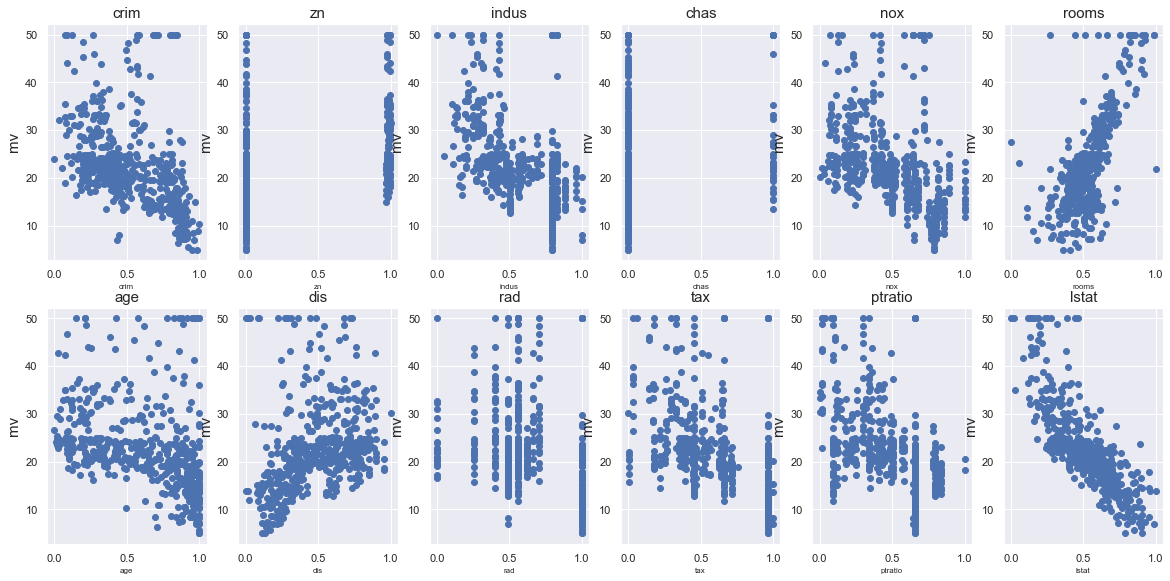

In [31]:
features = boston_df5.drop('mv', 1).columns
target = boston_Target
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(boston_df5[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8)
    plt.ylabel('mv', fontsize=15)

Drop taget variable since we already have it save in it's own df

In [32]:
featuresdf = boston_df5.drop('mv', 1)
featuresdf

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
0,0.000000,0.974993,0.206111,0.0,0.500909,0.577505,0.559560,0.587469,0.000000,0.425166,0.128875,0.266577
1,0.163141,0.000000,0.462097,0.0,0.313594,0.547998,0.725265,0.666469,0.257546,0.251248,0.339415,0.451500
2,0.163042,0.000000,0.462097,0.0,0.313594,0.694386,0.512140,0.666469,0.257546,0.251248,0.339415,0.207913
3,0.186434,0.000000,0.195938,0.0,0.278772,0.658555,0.345103,0.745024,0.397197,0.170949,0.443891,0.125618
4,0.294254,0.000000,0.195938,0.0,0.278772,0.687105,0.434788,0.745024,0.397197,0.170949,0.443891,0.286011
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.280213,0.000000,0.631565,0.0,0.579388,0.580954,0.605624,0.372463,0.000000,0.357527,0.798991,0.470001
502,0.233660,0.000000,0.631565,0.0,0.579388,0.490324,0.697939,0.336446,0.000000,0.357527,0.798991,0.449354
503,0.275852,0.000000,0.631565,0.0,0.579388,0.654340,0.880112,0.312006,0.000000,0.357527,0.798991,0.302419
504,0.360297,0.000000,0.631565,0.0,0.579388,0.619467,0.857906,0.355971,0.000000,0.357527,0.798991,0.343623


In [182]:
#remove target and keep all features independent variables to train on
X = featuresdf

In [183]:
# Save target in Y
Y = boston_Target['mv']

Run initial model with Ordinary Least Squares Linear Regression befor splitting.

In [184]:
model=sm.OLS(Y, X)

In [185]:
#save learned algorithm
results=model.fit()

Saw R^2 is pretty high means it overfits to existing data

In [186]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     mv   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              737.3
Date:                Fri, 09 Oct 2020   Prob (F-statistic):                   2.85e-306
Time:                        20:45:43   Log-Likelihood:                         -1589.1
No. Observations:                 506   AIC:                                      3202.
Df Residuals:                     494   BIC:                                      3253.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Train with all features involved 

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [212]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(404, 12)
(102, 12)
(404,)
(102,)


In [213]:
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_train, y_train)

# Predict
y_predicted_lrm = lrm.predict(X_test)

In [214]:
print(lrm.coef_)
print(lrm.intercept_)

[  0.49836874   0.30405808  -2.93067293   2.06843942  -8.38263356
  12.42796078   2.42287747 -14.71996785   3.59660469  -5.95831525
  -4.63513041 -29.74021908]
45.63986505610792


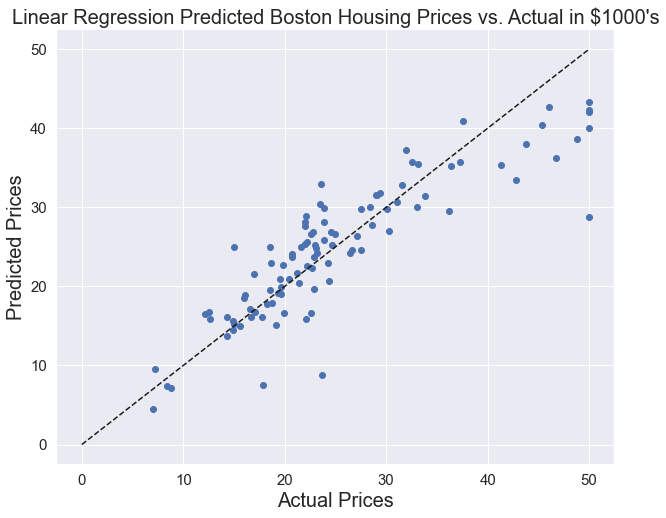

In [191]:

plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_lrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Linear Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [192]:
print("Linear Regression R_squared = ",lrm.score(X,Y)) 
pred= lrm.predict(X_test)
rmse = sqrt(mean_squared_error(pred, y_test))
print('Linear Regression RMSE = ', rmse)

Linear Regression R_squared =  0.7799189130578416
Linear Regression RMSE =  4.904241528656867


In [134]:
# Seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# The model input data outside of the modeling method calls
names = ['Linear_Regression']

# Specify the set of regression models being evaluated (we set normalize=False because we have standardized above)
regressors = [LinearRegression(fit_intercept = True, normalize = False), 
              Ridge(alpha = 75, solver = 'cholesky', fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              Lasso(alpha = 0.01, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.01, l1_ratio = 0.5, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              ]

Now we want to same thing with some columns dropped with values higher than 0.05 and variables that involve colinearlity but including nox

In [198]:
Randreg = RandomForestRegressor(oob_score = True)

# Fit data on to the model
Randreg.fit(X_train, y_train)
print(Randreg.oob_score_)
# Predict
y_predicted_Randreg = Randreg.predict(X_test)

0.8469227952496666


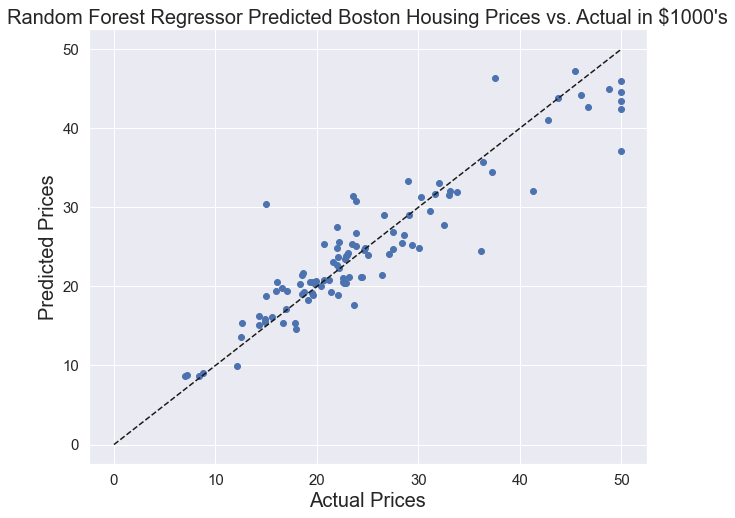

In [136]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_Randreg)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Random Forest Regressor Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [137]:
print("Random Forest Regressor R_squared = ",Randreg.score(X,Y)) 
pred= Randreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Random Forest Regressor RMSE = ', rmse)

Random Forest Regressor R_squared =  0.948699033441263
Random Forest Regressor RMSE =  2.0776807299041447


In [138]:
print(Randreg.decision_path(X))

(<506x48614 sparse matrix of type '<class 'numpy.int64'>'
	with 562830 stored elements in Compressed Sparse Row format>, array([    0,   487,   964,  1427,  1926,  2411,  2892,  3359,  3840,
        4313,  4792,  5289,  5752,  6253,  6726,  7217,  7700,  8173,
        8650,  9143,  9646, 10133, 10598, 11085, 11586, 12083, 12558,
       13055, 13538, 14019, 14512, 14977, 15476, 15951, 16456, 16921,
       17396, 17873, 18362, 18845, 19348, 19841, 20318, 20815, 21296,
       21795, 22300, 22787, 23298, 23781, 24278, 24769, 25262, 25745,
       26234, 26745, 27208, 27699, 28162, 28651, 29130, 29615, 30100,
       30579, 31068, 31553, 32046, 32523, 33016, 33499, 33992, 34459,
       34942, 35411, 35884, 36353, 36850, 37345, 37850, 38343, 38824,
       39325, 39800, 40289, 40772, 41261, 41766, 42249, 42726, 43241,
       43696, 44211, 44702, 45203, 45694, 46197, 46672, 47167, 47644,
       48129, 48614]))


In [139]:
ETreg = ExtraTreesRegressor()

# Fit data on to the model
ETreg.fit(X_train, y_train)

# Predict
y_predicted_ETreg = ETreg.predict(X_test)

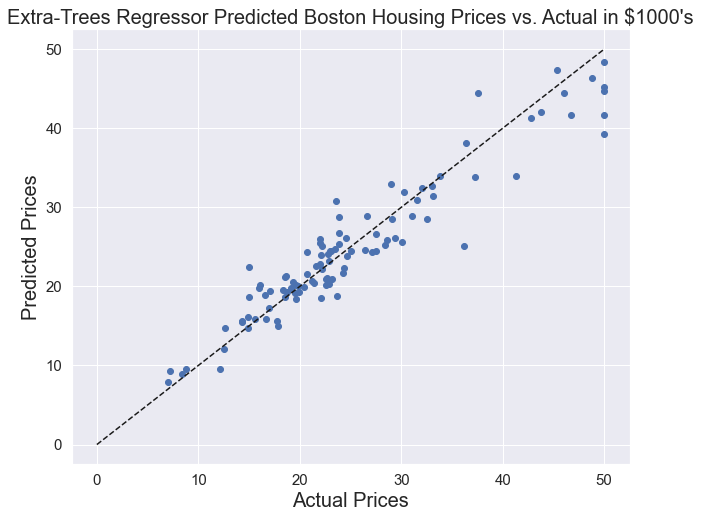

In [140]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predicted_ETreg)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Extra-Trees Regressor Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [141]:
print("Extra-Trees Regressor R_squared = ",ETreg.score(X,Y)) 
pred= ETreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Extra-Trees Regressor RMSE = ', rmse)


Extra-Trees Regressor R_squared =  0.9757791138600801
Extra-Trees Regressor RMSE =  1.4276148341287662


In [142]:
ETreg.feature_importances_

array([0.03434324, 0.00747711, 0.03959489, 0.00766035, 0.03439174,
       0.27874734, 0.02657861, 0.04776678, 0.01110838, 0.03148018,
       0.04489207, 0.43595932])

In [209]:
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_test, y_test)

LinearRegression()

In [210]:
print("Linear Regression R_squared = ",lrm.score(X,Y)) 
pred= lrm.predict(X_test)
rmse = sqrt(mean_squared_error(pred, y_test))
print('Linear Regression RMSE = ', rmse)

print(lrm.coef_)
print(lrm.intercept_)

Linear Regression R_squared =  0.748352165708644
Linear Regression RMSE =  4.35223867453816
[ 11.21073066   1.32822039  -1.89162496   3.71932116 -11.04283759
  23.94308498  -2.34720544 -18.44677227   3.41590743  -9.04467456
  -7.68466112 -21.91713556]
38.80670993301582


In [201]:
Randreg = RandomForestRegressor(oob_score = True)

# Fit data on to the model
Randreg.fit(X_test, y_test)
print(Randreg.oob_score_)

0.7561275016777594


In [146]:
print("Random Forest Regressor R_squared = ",Randreg.score(X,Y)) 
pred= Randreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Random Forest Regressor RMSE = ', rmse)

print(Randreg.decision_path(X))

Random Forest Regressor R_squared =  0.8653145231674304
Random Forest Regressor RMSE =  3.3664829714165996
(<506x12362 sparse matrix of type '<class 'numpy.int64'>'
	with 420508 stored elements in Compressed Sparse Row format>, array([    0,   127,   254,   375,   500,   615,   744,   879,   996,
        1113,  1218,  1345,  1476,  1607,  1730,  1865,  1994,  2125,
        2234,  2351,  2482,  2615,  2732,  2857,  2986,  3119,  3244,
        3375,  3494,  3607,  3730,  3855,  3980,  4097,  4230,  4359,
        4480,  4603,  4736,  4867,  4990,  5107,  5238,  5367,  5486,
        5609,  5730,  5857,  5968,  6093,  6210,  6331,  6452,  6583,
        6716,  6827,  6948,  7083,  7198,  7327,  7448,  7579,  7702,
        7825,  7940,  8061,  8176,  8295,  8426,  8543,  8674,  8799,
        8920,  9049,  9170,  9281,  9408,  9535,  9662,  9789,  9910,
       10025, 10148, 10271, 10396, 10533, 10654, 10765, 10892, 11011,
       11122, 11249, 11378, 11497, 11630, 11755, 11880, 11999, 12118,
  

In [147]:
ETreg = ExtraTreesRegressor()

# Fit data on to the model
ETreg.fit(X_test, y_test)

ExtraTreesRegressor()

In [148]:
print("Extra-Trees Regressor R_squared = ",ETreg.score(X,Y)) 
pred= ETreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Extra-Trees Regressor RMSE = ', rmse)

ETreg.feature_importances_

Extra-Trees Regressor R_squared =  0.8848625751947294
Extra-Trees Regressor RMSE =  3.1126070284945997


array([0.02891771, 0.00740353, 0.02269477, 0.03461415, 0.04545708,
       0.36245977, 0.01947177, 0.03958159, 0.02482691, 0.03431309,
       0.04720921, 0.33305042])

In [149]:
model_data=boston_df6.values

In [150]:
# Seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# The model input data outside of the modeling method calls
names = ['Linear Regression', 'Random Forest Regressor', 'Extra Trees Regressor']

# Specify the set of regression models being evaluated (we set normalize=False because we have standardized above)
regressors = [LinearRegression(fit_intercept = True, normalize = False), 
              RandomForestRegressor(n_estimators = 100, criterion='mse', max_features = 10, bootstrap=True, n_jobs = -1, random_state = RANDOM_SEED),
              ExtraTreesRegressor(n_estimators = 100, criterion='mse', max_features = 10, bootstrap=True, n_jobs = -1, random_state = RANDOM_SEED)
            ]


In [151]:
# Establish number of cross folds employed for cross-validation
N_FOLDS = 10

# Setup numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

# Initiate splitting process
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# Check the splitting process by looking at fold observation counts
index_for_fold = 0  # Fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold, '---------------------------------------------------------------------------------------')

# The structure of modeling data for this study has the response variable coming first and explanatory variables later          
# so 1:model_data.shape[1] slices for explanatory variables and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # Method count initialized
    for name, reg_model in zip(names, regressors):
        reg_model.fit(X_train, y_train)  # Fit on the train set for this fold
 
        # Evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n---------------------------------------------------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')    
print(cv_results_df.mean())


Fold index: 0 ---------------------------------------------------------------------------------------

Fold index: 1 ---------------------------------------------------------------------------------------

Fold index: 2 ---------------------------------------------------------------------------------------

Fold index: 3 ---------------------------------------------------------------------------------------

Fold index: 4 ---------------------------------------------------------------------------------------

Fold index: 5 ---------------------------------------------------------------------------------------

Fold index: 6 ---------------------------------------------------------------------------------------

Fold index: 7 ---------------------------------------------------------------------------------------

Fold index: 8 ---------------------------------------------------------------------------------------

Fold index: 9 ----------------------------------------------------------

In [152]:
cv_results_df.head(10)

,Linear Regression,Random Forest Regressor,Extra Trees Regressor
0,0.075081,0.068434,0.070781
1,0.078732,0.050347,0.050986
2,0.066255,0.045301,0.041568
3,0.110983,0.103409,0.109652
4,0.106297,0.073054,0.066398
5,0.108108,0.098385,0.090506
6,0.069981,0.062374,0.063247
7,0.235195,0.206456,0.194840
8,0.109354,0.103207,0.092707
9,0.105199,0.082600,0.073768


In [153]:
param_grid = { 
            "n_estimators"      : [100,125,150],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [154]:
estimator = RandomForestRegressor()


In [155]:
grid = GridSearchCV(estimator, param_grid, cv=10)


In [156]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [100, 125, 150]})

In [157]:
X = X.drop(['crim', 'zn', 'age'], 1)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [159]:
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_train, y_train)

# Predict
y_predicted_lrm = lrm.predict(X_test)

In [160]:
print("Linear Regression R_squared = ",lrm.score(X,Y)) 
pred= lrm.predict(X_test)
rmse = sqrt(mean_squared_error(pred, y_test))
print('Linear Regression RMSE = ', rmse)

Linear Regression R_squared =  0.7788884828495811
Linear Regression RMSE =  4.8832481772422955


In [161]:
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_test, y_test)

print("Linear Regression R_squared = ",lrm.score(X,Y)) 
pred= lrm.predict(X_test)
rmse = sqrt(mean_squared_error(pred, y_test))
print('Linear Regression RMSE = ', rmse)

Linear Regression R_squared =  0.757518756802708
Linear Regression RMSE =  4.5063094117325075


In [203]:
Randreg = RandomForestRegressor(oob_score = True)

# Fit data on to the model
Randreg.fit(X_train, y_train)
print(Randreg.oob_score_)
# Predict
y_predicted_Randreg = Randreg.predict(X_test)

0.8511319157105197


In [163]:
print("Random Forest Regressor R_squared = ",Randreg.score(X,Y)) 
pred= Randreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Random Forest Regressor RMSE = ', rmse)

print(Randreg.decision_path(X))

Random Forest Regressor R_squared =  0.95220917119023
Random Forest Regressor RMSE =  2.005341396520999
(<506x49104 sparse matrix of type '<class 'numpy.int64'>'
	with 566466 stored elements in Compressed Sparse Row format>, array([    0,   473,   984,  1481,  1994,  2499,  3006,  3507,  4004,
        4481,  5008,  5479,  5942,  6423,  6924,  7427,  7916,  8405,
        8910,  9419,  9882, 10371, 10862, 11343, 11844, 12353, 12828,
       13329, 13808, 14275, 14782, 15283, 15782, 16257, 16732, 17223,
       17716, 18207, 18700, 19203, 19688, 20175, 20668, 21161, 21654,
       22123, 22608, 23091, 23582, 24077, 24556, 25057, 25536, 26039,
       26522, 27007, 27508, 27981, 28470, 28975, 29478, 29965, 30454,
       30939, 31424, 31937, 32404, 32901, 33390, 33877, 34358, 34841,
       35336, 35825, 36292, 36785, 37272, 37759, 38264, 38737, 39244,
       39753, 40230, 40723, 41220, 41721, 42198, 42693, 43200, 43691,
       44164, 44651, 45140, 45639, 46144, 46643, 47140, 47621, 48104,
     

In [204]:
Randreg = RandomForestRegressor(oob_score=True)

# Fit data on to the model
Randreg.fit(X_test, y_test)
print(Randreg.oob_score_)
print("Random Forest Regressor R_squared = ",Randreg.score(X,Y)) 
pred= Randreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Random Forest Regressor RMSE = ', rmse)

print(Randreg.decision_path(X))

0.7690693844384108
Random Forest Regressor R_squared =  0.8657236418646057
Random Forest Regressor RMSE =  3.36136609222037
(<506x12416 sparse matrix of type '<class 'numpy.int64'>'
	with 417861 stored elements in Compressed Sparse Row format>, array([    0,   125,   244,   357,   470,   585,   708,   839,   970,
        1087,  1210,  1333,  1456,  1579,  1706,  1825,  1962,  2097,
        2222,  2359,  2492,  2617,  2746,  2869,  2992,  3111,  3242,
        3369,  3490,  3611,  3744,  3861,  3988,  4107,  4220,  4341,
        4470,  4595,  4716,  4835,  4962,  5089,  5214,  5353,  5476,
        5605,  5728,  5859,  5978,  6097,  6222,  6351,  6472,  6585,
        6714,  6823,  6954,  7079,  7208,  7331,  7450,  7579,  7692,
        7811,  7946,  8077,  8200,  8319,  8448,  8569,  8684,  8811,
        8940,  9073,  9190,  9311,  9418,  9553,  9676,  9805,  9936,
       10063, 10194, 10315, 10444, 10557, 10686, 10817, 10938, 11059,
       11190, 11307, 11428, 11555, 11678, 11799, 11928,

In [165]:
ETreg = ExtraTreesRegressor()

# Fit data on to the model
ETreg.fit(X_train, y_train)

# Predict
y_predicted_ETreg = ETreg.predict(X_test)

In [166]:
print("Extra-Trees Regressor R_squared = ",ETreg.score(X,Y)) 
pred= ETreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Extra-Trees Regressor RMSE = ', rmse)

ETreg.feature_importances_

Extra-Trees Regressor R_squared =  0.9714333306997563
Extra-Trees Regressor RMSE =  1.5504074321073142


array([0.05020814, 0.00768331, 0.04984039, 0.30247079, 0.05747416,
       0.01533284, 0.03958037, 0.05673681, 0.42067319])

In [167]:
ETreg = ExtraTreesRegressor()

# Fit data on to the model
ETreg.fit(X_test, y_test)

print("Extra-Trees Regressor R_squared = ",ETreg.score(X,Y)) 
pred= ETreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Extra-Trees Regressor RMSE = ', rmse)

ETreg.feature_importances_

Extra-Trees Regressor R_squared =  0.88467982974532
Extra-Trees Regressor RMSE =  3.1150762049821257


array([0.03512377, 0.03896161, 0.03888613, 0.39904249, 0.04258862,
       0.02458222, 0.0444144 , 0.05965775, 0.31674301])

In [168]:
X = X.drop(['chas', 'rad', 'ptratio'], 1)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [170]:
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_train, y_train)

# Predict
y_predicted_lrm = lrm.predict(X_test)

In [171]:
print("Linear Regression R_squared = ",lrm.score(X,Y)) 
pred= lrm.predict(X_test)
rmse = sqrt(mean_squared_error(pred, y_test))
print('Linear Regression RMSE = ', rmse)

Linear Regression R_squared =  0.7538953990267538
Linear Regression RMSE =  5.370813842614971


In [206]:
Randreg = RandomForestRegressor(oob_score = True)

# Fit data on to the model
Randreg.fit(X_train, y_train)
print(Randreg.oob_score_)
# Predict
y_predicted_Randreg = Randreg.predict(X_test)


0.8460076065336399


In [173]:
print("Random Forest Regressor R_squared = ",Randreg.score(X,Y)) 
pred= Randreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Random Forest Regressor RMSE = ', rmse)

print(Randreg.decision_path(X))

Random Forest Regressor R_squared =  0.9460225309217469
Random Forest Regressor RMSE =  2.1311906227167325
(<506x49198 sparse matrix of type '<class 'numpy.int64'>'
	with 563039 stored elements in Compressed Sparse Row format>, array([    0,   495,   968,  1445,  1928,  2441,  2942,  3439,  3952,
        4423,  4904,  5411,  5914,  6411,  6918,  7411,  7902,  8367,
        8860,  9365,  9854, 10341, 10850, 11345, 11846, 12343, 12830,
       13311, 13796, 14285, 14794, 15285, 15770, 16261, 16782, 17299,
       17780, 18251, 18730, 19221, 19698, 20179, 20678, 21157, 21662,
       22141, 22624, 23123, 23608, 24121, 24624, 25121, 25618, 26105,
       26600, 27093, 27572, 28073, 28574, 29089, 29576, 30073, 30552,
       31023, 31510, 32003, 32516, 33011, 33500, 33971, 34482, 34949,
       35436, 35951, 36428, 36915, 37408, 37915, 38402, 38875, 39368,
       39871, 40340, 40823, 41310, 41803, 42296, 42785, 43272, 43759,
       44258, 44747, 45258, 45761, 46260, 46743, 47220, 47721, 48218,
  

In [174]:
ETreg = ExtraTreesRegressor()

# Fit data on to the model
ETreg.fit(X_train, y_train)

# Predict
y_predicted_ETreg = ETreg.predict(X_test)

In [175]:
print("Extra-Trees Regressor R_squared = ",ETreg.score(X,Y)) 
pred= ETreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Extra-Trees Regressor RMSE = ', rmse)

ETreg.feature_importances_

Extra-Trees Regressor R_squared =  0.9724372036218448
Extra-Trees Regressor RMSE =  1.5229220554435874


array([0.07066006, 0.05756401, 0.28634819, 0.06159156, 0.06808642,
       0.45574976])

In [176]:
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_test, y_test)

LinearRegression()

In [177]:
print("Linear Regression R_squared = ",lrm.score(X,Y)) 
pred= lrm.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Linear Regression RMSE = ', rmse)

Linear Regression R_squared =  0.7330092454955464
Linear Regression RMSE =  4.739845103037422


In [207]:
Randreg = RandomForestRegressor(oob_score = True)

# Fit data on to the model
Randreg.fit(X_test, y_test)
print(Randreg.oob_score_)

0.7786598216920804


In [179]:
print("Random Forest Regressor R_squared = ",Randreg.score(X,Y)) 
pred= Randreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Random Forest Regressor RMSE = ', rmse)

print(Randreg.decision_path(X))

Random Forest Regressor R_squared =  0.8576266582003425
Random Forest Regressor RMSE =  3.461229347621728
(<506x12280 sparse matrix of type '<class 'numpy.int64'>'
	with 421832 stored elements in Compressed Sparse Row format>, array([    0,   125,   250,   365,   486,   607,   732,   863,   990,
        1127,  1252,  1377,  1510,  1631,  1744,  1859,  1984,  2103,
        2220,  2333,  2448,  2573,  2704,  2835,  2952,  3065,  3192,
        3321,  3464,  3587,  3714,  3843,  3962,  4089,  4206,  4337,
        4466,  4591,  4714,  4849,  4972,  5101,  5228,  5345,  5470,
        5593,  5708,  5839,  5968,  6083,  6202,  6319,  6440,  6555,
        6670,  6797,  6914,  7029,  7154,  7275,  7382,  7503,  7626,
        7739,  7870,  7999,  8124,  8227,  8344,  8467,  8590,  8721,
        8848,  8975,  9100,  9227,  9348,  9471,  9604,  9721,  9850,
        9967, 10094, 10215, 10344, 10481, 10598, 10715, 10834, 10959,
       11078, 11201, 11324, 11449, 11576, 11703, 11824, 11947, 12060,
   

In [180]:
ETreg = ExtraTreesRegressor()

# Fit data on to the model
ETreg.fit(X_test, y_test)

ExtraTreesRegressor()

In [181]:
print("Extra-Trees Regressor R_squared = ",ETreg.score(X,Y)) 
pred= ETreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Extra-Trees Regressor RMSE = ', rmse)

ETreg.feature_importances_

Extra-Trees Regressor R_squared =  0.8781600745576015
Extra-Trees Regressor RMSE =  3.201922752695517


array([0.04743791, 0.05638703, 0.39701832, 0.05766252, 0.05678102,
       0.38471321])